Quoting from the Coursera materials:

>The background for this material can be found in Sections 2 and 3 of Part I of this class. Short version: Joules are units of energy; Watts are energy flow (J/s). The temperature of a planet is determined by balancing energy fluxes into and out of a planet. Incoming solar heat is determined by L * (1-albedo) / 4, and outgoing infrared is calculated as epsilon * sigma * T^4.

>The goal is to numerically simulate how the planetary temperature of a naked planet would change through time as it approaches equilibrium (the state at which it stops changing, which we calculated before). The planet starts with some initial temperature. The “heat capacity” (units of Joules / m2 K) of the planet is set by a layer of water which absorbs heat and changes its temperature. If the layer is very thick, it takes a lot more heat (Joules) to change the temperature. The differential equation you are going to solve is

```
dHeatContent/dt = L*(1-alpha)/4 - epsilon * sigma * T^4
T[K] = HeatContent [J/m2] / HeatCapacity [J/m2 K]
HeatContent(t+1) = HeatContent(t) + dHeatContent/dT * TimeStep

timeStep = 100           # years
waterDepth = 4000        # meters
L = 1350                 # Watts/m2
albedo = 0.3
epsilon = 1
sigma = 5.67E-8          # W/m2 K4

```

I kind of like the spreadsheet version of this, to be honest, but here goes.

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns # makes plots look pretty
from ipywidgets import interact, fixed

In [3]:
for i in (1,5,2,7,12):
    print(i,i*2,i**2)

1 2 1
5 10 25
2 4 4
7 14 49
12 24 144


In [4]:
range(10)

range(0, 10)

In [5]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


254.06637327521028 236.2499970165995


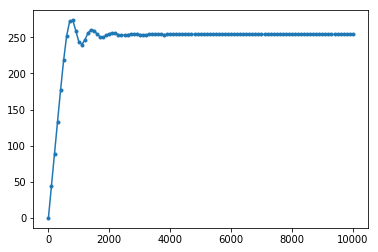

In [11]:
timestep = 100.0 # years
water_depth = 4000.0 # m
L = 1350.0 # W/m^2
albedo = 0.3
epsilon = 1
sigma = 5.67e-8 # W/m^2 K^4

kg_per_m2 = 1*water_depth*1000
cal_for_1K = 1000*kg_per_m2
Joules_for_1K = 4.184 * cal_for_1K

heat_capacity = Joules_for_1K # J/m^2 K

time, T, heat_content, heat_in, heat_out, heat_flux = [], [], [], [], [], []
time.append(0)
T.append(0)
heat_content.append(T[-1]*heat_capacity)
heat_in.append(L*(1-albedo)/4)
heat_out.append(epsilon*sigma*T[-1]**4)
heat_flux.append((heat_in[-1]-heat_out[-1])*60*60*24*365)

nSteps = 100
for i in range(nSteps):
    time.append(time[-1] + timestep)

    heat_content.append(heat_content[-1] + heat_flux[-1]*timestep)
    T.append(heat_content[-1]/heat_capacity)

    heat_in.append(L*(1-albedo)/4)
    heat_flux.append((heat_in[-1]-heat_out[-1])*60*60*24*365)
    heat_out.append(epsilon*sigma*T[-1]**4)
print(T[-1],heat_out[-1])
plt.plot(time,T,'.-')